In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-6.76631289,  6.98325577],
       [-8.56465424,  6.53591831],
       [ 6.06002232, -8.61690584],
       ...,
       [-9.41652392,  7.90794666],
       [ 3.89727226, -0.0842306 ],
       [ 4.42108915, -7.84105698]])

In [4]:
y

array([0, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2,
       1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2,
       1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2,
       1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0,
       1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0,
       1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0,
       2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1,

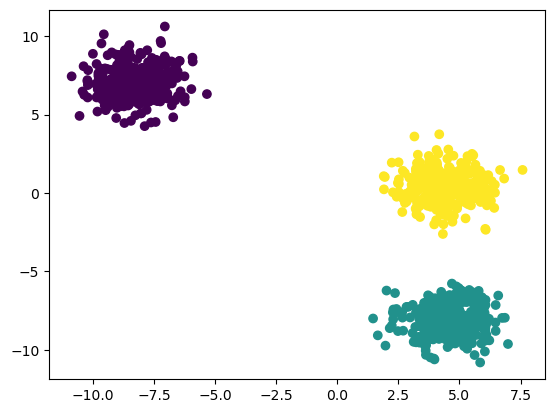

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\anoop\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\anoop\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\anoop\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anoop\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\anoop\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [12]:
wcss

[1340.000000000001,
 231.45430587820468,
 31.881255514151363,
 28.4959599151561,
 24.12210585775492,
 21.99441248761547,
 18.702249492149267,
 17.687002726476575,
 15.31399358954135,
 13.090947925788445]

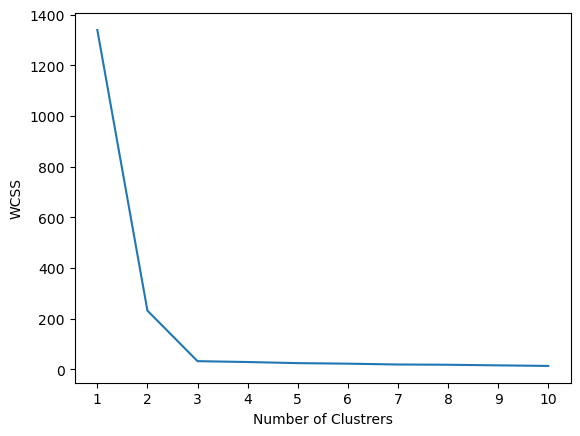

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

c:\Users\anoop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1,
       2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2,
       2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1,
       1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1,
       2, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1,
       1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 2,
       1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2,
       0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1,
       2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 1, 2,
       1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1,
       2, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2,
       2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1,

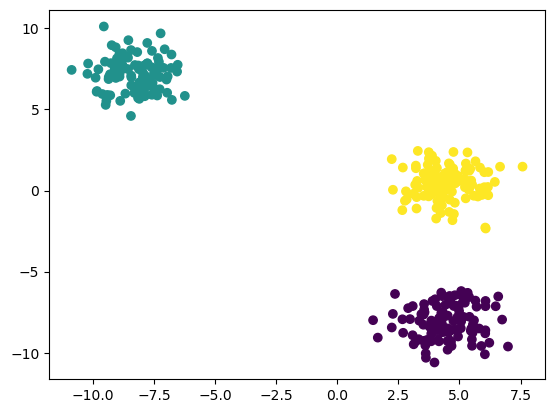

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

## Validating the k value
## kneelocator
## Silhoutee scoring

In [19]:
## kneelocator
! pip install kneed

In [20]:
from kneed import KneeLocator

In [21]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [22]:

kl.elbow

3

In [23]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\anoop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\anoop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\anoop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\anoop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [26]:
silhouette_coefficients

[0.764362653869002,
 0.8280103638613897,
 0.6644544243874697,
 0.675440541706486,
 0.47163784965179295,
 0.3296010110458294,
 0.31962122281765454,
 0.3356687315748758,
 0.3207289697531582]

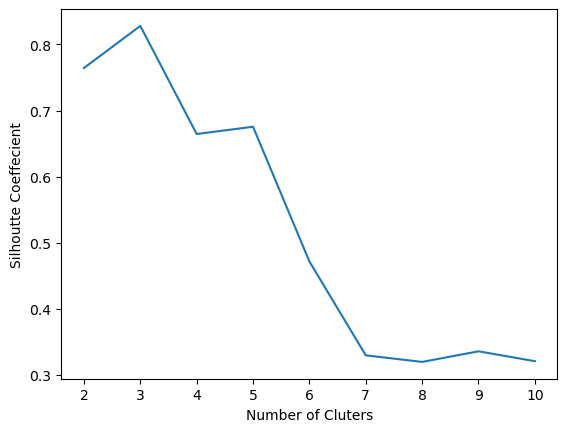

In [27]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()